In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from IPython.display import Image
from qutip import *
import pickle
import time

import sympy
import numpy as np
from sympy import Sum, summation
from sympy.physics.wigner import wigner_3j
import math
import sys

In [2]:
with open("tevolve0304.txt","rb") as fp:
    EIT_comp = pickle.load(fp)

In [3]:
with open("tevolve0221.txt","rb") as fp:
    EIT_comp1 = pickle.load(fp)

In [4]:
tlist = np.linspace(0,100,100)

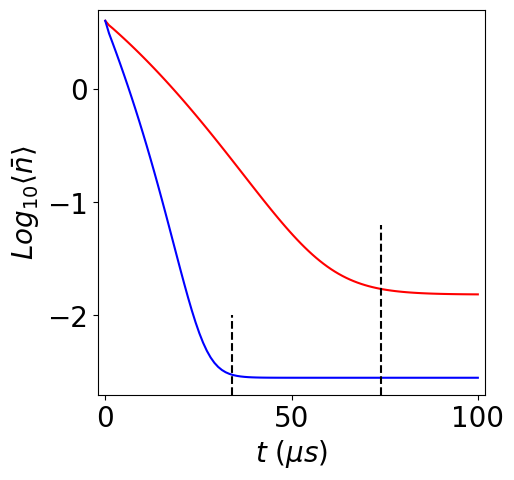

In [5]:
plt.rcParams.update({'font.size':20})
fig, ax = plt.subplots( figsize=(5, 5))
ax.plot(tlist, np.log(EIT_comp.get("rr")[0])/np.log(10), color = "red", label="RW")
ax.plot(tlist, np.log(EIT_comp.get("sr")[0])/np.log(10), color = "blue", label="SW")
ax.set_ylabel(r"$Log_{10}\langle \bar{n} \rangle$")
ax.set_xlabel(r"$t$ $(\mu s)$")
#ax.legend()

ax.plot([34,34],[-2.7,-2], color='black', linestyle='--')
ax.plot([74,74],[-2.7,-1.2], color='black', linestyle='--')

ax.set_ylim([-2.7, 0.7])
ax.set_xlim([-2, 102])

#ax.set_title(r"$\Delta = 5 \Gamma, \omega_m = 3MHz$")
plt.savefig('8LEIT_tevolve.pdf', bbox_inches = 'tight')

In [6]:
with open("EIT_imp_B10_pi_comp0613.txt","rb") as fp:
    EIT_comp = pickle.load(fp)
with open("EIT_imp_B10_pi_ncomp0617.txt","rb") as fp:
    EIT_ncomp = pickle.load(fp)

In [7]:
w_s, w_r = [], []
sr = EIT_comp.get("sr")
rr = EIT_comp.get("rr")
n_sr = EIT_ncomp.get("sr")
n_rr = EIT_ncomp.get("rr")
nss_s, nss_r = [], []

for i in range(20):
    w_s.append(sr[i][4])
    w_r.append(rr[i][4])
    nss_s.append(n_sr[i][1])
    nss_r.append(n_rr[i][1])

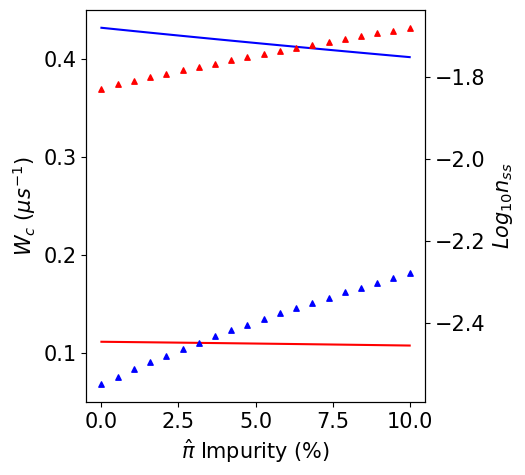

In [9]:
plt.rcParams.update({'font.size':15})
ps = np.linspace(0,10,20)
fig, axL = plt.subplots( figsize=(5.5, 5), sharex = True, sharey = True)
axL.plot(ps, w_s, color = "blue", label="SW")
axL.plot(ps, w_r, color = "red", label="RW")
axL.set_ylim(0.05,0.45) 
axL.set_yticks([0.1, 0.2, 0.3, 0.4]) 
axL.set_ylabel("$W_c$ ($\mu s^{-1}$)")
axL.set_xlabel("$\hat{\pi}$ Impurity $(\%)$")

axL2 = axL.twinx()  # instantiate a second axes that shares the same x-axis
axL2.scatter(ps, np.log(nss_s)/np.log(10), color="blue", marker = "^", s = 15,  label="SW")
axL2.scatter(ps, np.log(nss_r)/np.log(10), color="red", marker = "^", s = 15, label="RW")
axL2.set_ylabel("$Log_{10}n_{ss}$")

fig.tight_layout()

In [14]:
with open("EIT_imp_B10_sig_comp0614.txt","rb") as fp:
    EIT_comp = pickle.load(fp)
with open("EIT_imp_B10_sig_ncomp0617.txt","rb") as fp:
    EIT_ncomp = pickle.load(fp)

In [15]:
w_s, w_r = [], []
sr = EIT_comp.get("sr")
rr = EIT_comp.get("rr")
n_sr = EIT_ncomp.get("sr")
n_rr = EIT_ncomp.get("rr")
nss_s, nss_r = [], []

for i in range(20):
    w_s.append(sr[i][4])
    w_r.append(rr[i][4])
    nss_s.append(n_sr[i][1])
    nss_r.append(n_rr[i][1])

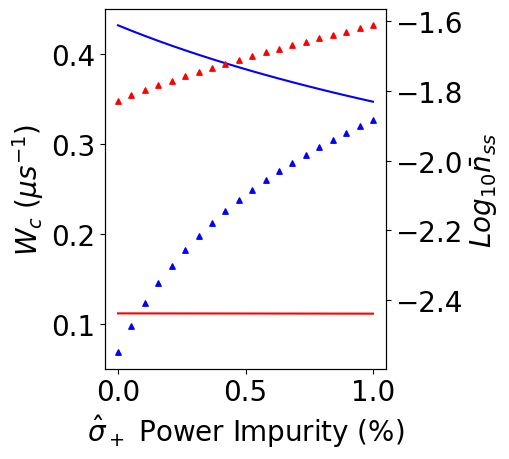

In [16]:
plt.rcParams.update({'font.size':20})
ps = np.linspace(0,1,20)
fig, ax = plt.subplots(figsize=(5.5, 5))

ax.plot(ps, w_s, "-", color = "blue", label="SW")
ax.plot(ps, w_r, "-", color = "red", label="RW")
ax.set_ylim(0.05,0.45) 
ax.set_yticks([0.1, 0.2, 0.3, 0.4]) 
ax.set_ylabel("$W_c$ ($\mu s^{-1}$)")
ax.set_xlabel("$\hat{\sigma}_+$ Power Impurity $(\%)$")

ax2 = ax.twinx()
ax2.scatter(ps, np.log(nss_s)/np.log(10), color="blue", marker = "^", s = 15,  label="SW")
ax2.scatter(ps, np.log(nss_r)/np.log(10), color="red", marker = "^", s = 15, label="RW")
ax2.set_ylabel(r"$Log_{10}\bar{n}_{ss}$")

fig.tight_layout()

In [17]:
with open("EIT_imp_B10_cooling_0716.txt","rb") as fp:
    EIT_comp = pickle.load(fp)
    
with open("EIT_imp_B10_cooling_n0716.txt","rb") as fp:
    EIT_ncomp = pickle.load(fp)

In [18]:
w_s, w_r = [], []
sr = EIT_comp.get("sr")
n_sr = EIT_ncomp.get("sr")
nss_s, nss_r = [], []

for i in range(20):
    w_s.append(sr[i][4])
    nss_s.append(n_sr[i][1])

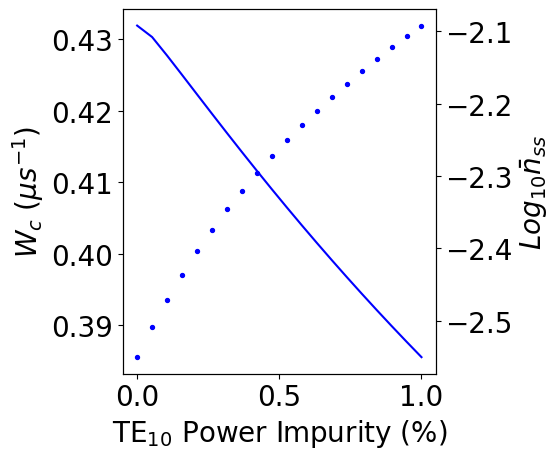

In [19]:
plt.rcParams.update({'font.size':20})
ps = np.linspace(0,1,20)
fig, axL = plt.subplots( figsize=(6, 5), sharex = True, sharey = True)
axL.plot(ps, w_s, color = "blue", label="SW")
axL.set_ylabel("$W_c$ ($\mu s^{-1}$)")
axL.set_xlabel("TE$_{10}$ Power Impurity $(\%)$")

axL2 = axL.twinx()  # instantiate a second axes that shares the same x-axis
axL2.scatter(ps, np.log(nss_s)/np.log(10), color="blue", marker = "o", s = 8,  label="SW")
axL2.set_ylabel(r"$Log_{10}\bar{n}_{ss}$")

fig.tight_layout()